In [1]:
import pandas as pd
import numpy as np

In [2]:
def nonlin(x,deriv=False):
# sigmoid function
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [13]:
def weekhour_mat(dataframe):
    in_nodes = np.zeros((len(dataframe),31))

    for i in range(len(dataframe)):
        weekday = int(dataframe.iloc[i].weekday)
        time = int(dataframe.iloc[i].time)
        # Weekday
        in_nodes[i][weekday] = 1
        # Time
        in_nodes[i][7+time] = 1
    return in_nodes

In [4]:
def weekminute_mat(dataframe):
    weeks = 7
    hours = 24
    minutes = 60
    mat = np.zeros((len(dataframe),weeks+hours+minutes))

    for i in range(len(dataframe)):
        weekday = dataframe.iloc[i].weekday
        hour = dataframe.iloc[i].hour
        minute = dataframe.iloc[i].minute
        # Weekday
        mat[i][weekday] = 1
        # Hour
        mat[i][weeks+hour] = 1
        # Minute
        mat[i][weeks+hours+minute] = 1

    return mat

In [5]:
def train_model(data_mat, seed=1, iterations=100, res='hour'):
    if res == 'hour':
        nodes = 31
    elif res == 'minute':
        nodes = 91
    
    np.random.seed(seed)

    w0 = 2*np.random.random((nodes,1)) - 1
    #w1 = 2*np.random.random(())

    for i in range(iterations):
        #L0 = np.array(X, dtype=int) # When converting from pandas dataframe
        #Y  = np.array(Y, dtype=int) # When using pandas

        L0 = data_mat[:, :-1]
        Y = data_mat[:, -1]

        L1 = nonlin(np.dot(L0, w0))

        L1_error = Y - L1

        if (i % (iterations/10) == 0):
            print('Error after iteration {i}: {error}'.format(i=i, error=np.mean(np.abs(L1_error))))

        L1_delta = L1_error * nonlin(L1, True)

        w0 += np.dot(L0.T, L1_delta)
    
    return w0

In [8]:
df = pd.read_csv('presence-21apr-04may.csv', sep=',', index_col=0, parse_dates=True) # original Data

In [9]:
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df['weekday'] = df.index.weekday

In [6]:
in_nodes = np.loadtxt('inputnodes-weekminute-21apr-04may.csv', delimiter=',' ,skiprows=1)

# Sample Data

In [10]:
temp = df

In [11]:
# Convert online/offline to 1/0 respectively
temp['value'] = temp.Value.apply(lambda x: 1 if x == 'online' else 0)

In [14]:
in_nodes = weekminute_mat(temp)

## Training

In [15]:
w0 = train_model(in_nodes, res='minute')

ValueError: shapes (93884,90) and (91,1) not aligned: 90 (dim 1) != 91 (dim 0)

In [ ]:
week_vec = np.zeros(7)
hour_vec = np.zeros(24)
minute_vec = np.zeros(60)

week_vec[6] = 1
hour_vec[23] = 1
minute_vec[30] = 1
print('%-.15f'%nonlin(np.dot(np.hstack((week_vec, hour_vec, minute_vec)), w0)))

In [ ]:
np.savetxt('weights-weekminute-21apr-04may.csv', w0, delimiter=',', fmt='%.8f')

In [ ]:
from itertools import chain

inputdf = pd.DataFrame(in_nodes, columns=chain(range(7), range(24), range(60)))

In [ ]:
inputdf['value'] = list(temp.value)

In [ ]:
inputdf.to_csv('inputnodes-weekminute-21apr-04may.csv', index=False)

In [ ]:
for i,j in zip(w0, np.hstack((week_vec, hour_vec, minute_vec))):
    print(i,j)

# Visualization

In [ ]:
temp['Value'] = temp.Value.apply(lambda x: 1 if x == 'online' else -1)

In [ ]:
#temp_week = temp[:'2018-04-27']
temp_week = temp['2018-04-28':]

In [ ]:
temp_week = temp_week.resample('1H').apply(lambda x: 1 if sum(x) > 0 else -1)

In [ ]:
is_online = temp_week['Value']==1

In [ ]:
temp_week['Date'] = temp_week.index.date
temp_week['Time'] = temp_week.index.time

## Bokeh

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In [42]:
df = pd.read_csv('presence-21apr-04may.csv', sep=',', index_col=0, parse_dates=True) # original Data

In [44]:
df['numval'] = df.Value.apply(lambda x: 1 if x == 'online' else -1)

In [51]:
df.head()

,Value,numval
Datetime,,
2018-04-21 14:08:30.761,offline,-1
2018-04-21 14:08:40.761,offline,-1
2018-04-21 14:08:50.761,offline,-1
2018-04-21 14:09:00.761,offline,-1
2018-04-21 14:09:10.761,offline,-1


In [59]:
# One week
df_week = df['2018-04-28':]

In [58]:
def resampler(x):
    x['numval'] = 1 if sum(x['numval']) > 0 else -1
    return x

In [61]:
df_week = df_week.resample('1T').apply(resampler)

In [64]:
df_week['weekday'] = df_week.index.weekday

In [65]:
df_week['time'] = df_week.index.time

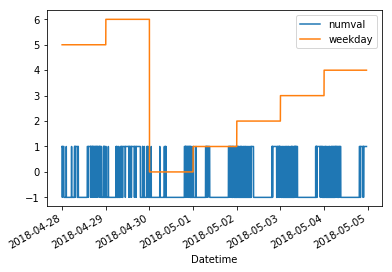

In [66]:
df_week.plot.line()

In [50]:
df_week

,numval,weekday,time
Datetime,,,
2018-04-28 00:00:00,1,5,00:00:00
2018-04-28 00:01:00,1,5,00:01:00
2018-04-28 00:02:00,1,5,00:02:00
2018-04-28 00:03:00,1,5,00:03:00
2018-04-28 00:04:00,1,5,00:04:00
2018-04-28 00:05:00,1,5,00:05:00
2018-04-28 00:06:00,1,5,00:06:00
2018-04-28 00:07:00,-1,5,00:07:00
2018-04-28 00:08:00,1,5,00:08:00


In [ ]:
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
#bpl.output_notebook()

In [ ]:
p = bpl.figure(width=800, height=600, tools="pan,box_zoom,reset,save", y_axis_label='Day', x_axis_label='Time', y_axis_type='datetime', x_axis_type='datetime')

In [ ]:
p.circle(temp_week['Time'][is_online], temp_week['Date'][is_online], fill_color='green', size=8)
p.circle(temp_week['Time'][~is_online], temp_week['Date'][~is_online], fill_color='red', size=8)

In [ ]:
p.yaxis.formatter = bmo.formatters.DatetimeTickFormatter(days='%a')

In [ ]:
bpl.show(p)